#The Sparks Foundation 
###GRIP Task 2 : Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
####Author : Harsh Bhavsar

so what is iris dataset ??
#####kaggle : https://www.kaggle.com/uciml/iris
#####Dataset: https://bit.ly/3kXTdox

step1: Importing required libraries 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.cluster import KMeans 

from google.colab import drive 

step2: Importing dataset from google drive

In [3]:
drive.mount("/content/gdrive")
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/GRIP TASK-2/Iris.csv')
data.head(10)

Mounted at /content/gdrive


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


step3: Learn Data 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


step4: Data visualization

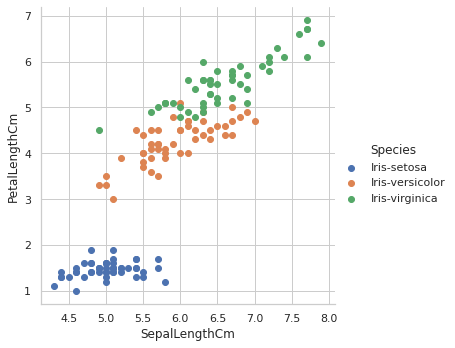

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Species",height = 5).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


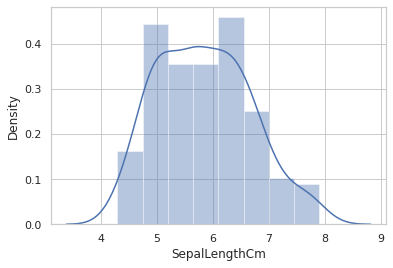

In [7]:
sns.distplot(data['SepalLengthCm']);

step:5 Clustering using K-means 
#####k-means : *https://youtu.be/AWKCCK5YHsE*

In [8]:
x = data.iloc[:,[0,1,2,3]].values
wcss = []

In [9]:
sum_of_squared_distance = []
K = range(1,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k
print("Clusters =",optimalK)

Clusters = 3


Step 6: Visual Representation of Optimal number of clusters using elbow method
##### [highlighted region indicates total no. of required clusters]

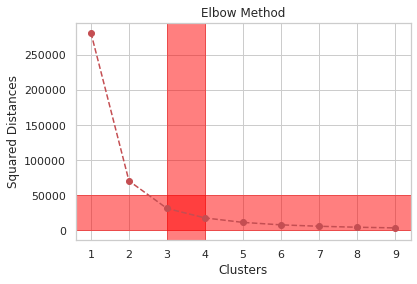

In [18]:
# Plotting Elbow Graph
plt.plot(K, sum_of_squared_distance, 'ro--')
plt.xlabel('Clusters')
plt.ylabel('Squared Distances')
plt.title('Elbow Method')
plt.axvspan(3, 4, color='red', alpha=0.5)
plt.axhspan(0, 50000, color='red', alpha=0.5)
plt.show()



Step 7: Apply K-means to the dataset


In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

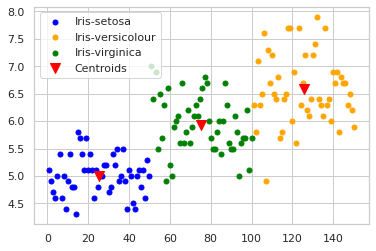

In [ ]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 25, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 25, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c = 'red', label = 'Centroids', marker = "vs")
plt.legend()

This concludes that 
####the optimon minimum clusters required clusters in this data set : 3
and represented visually 